<a href="https://colab.research.google.com/github/byrocuy/REA_AI_Bootcamp/blob/main/week-5/session-1/02_nn_vs_cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 comparison for regular Neural Network vs CNN

## CIFAR-10 dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

Source: [CIFAR 10 Dataset - cs.toronto.edu](https://www.cs.toronto.edu/~kriz/cifar.html)

### Let's explore the dataset:

In [1]:
!pip install torch torchvision matplotlib

100%|██████████| 170498071/170498071 [00:03<00:00, 44115833.01it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


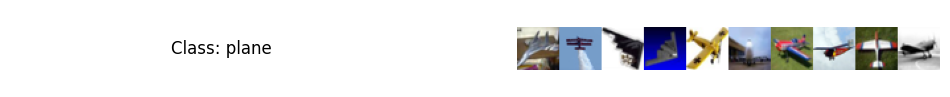

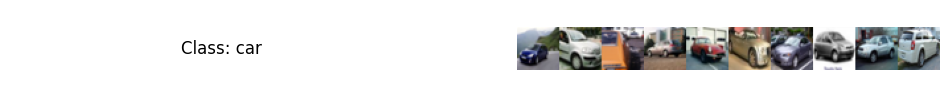

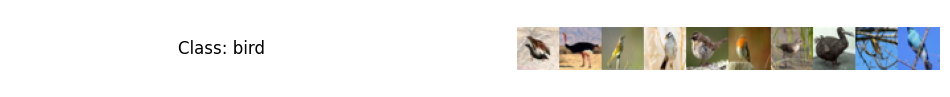

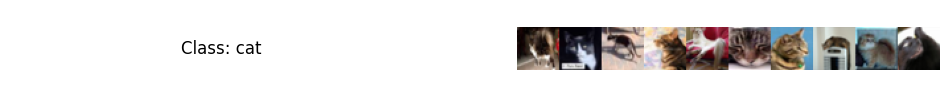

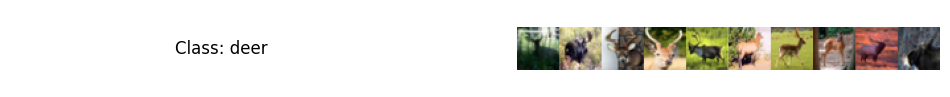

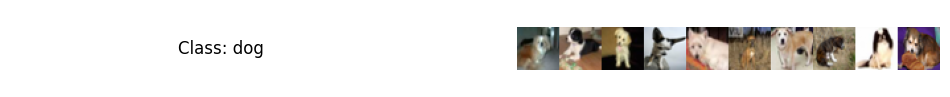

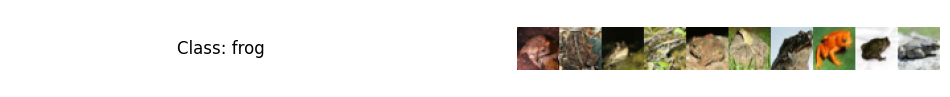

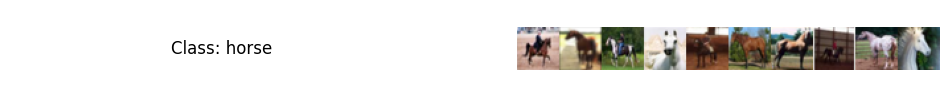

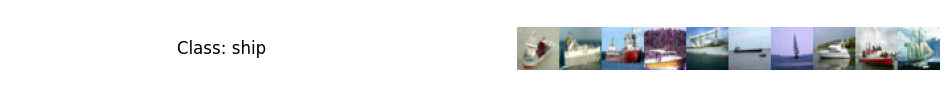

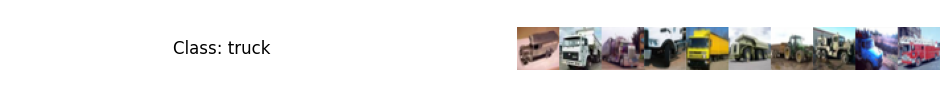

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define data transformations (you can customize these)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load the training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True, num_workers=2)

# Define class labels
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Function to display an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Function to display a grid of images from a specified class with labels
def show_images_from_class_with_labels(class_id, num_images=10):
    # Find indices of images from the specified class
    class_indices = [i for i, label in enumerate(trainset.targets) if label == class_id]

    # Randomly select num_images indices from the class
    selected_indices = np.random.choice(class_indices, num_images, replace=False)

    # Create a grid for displaying images and labels
    images_grid = []
    labels_grid = []

    for idx in selected_indices:
        image, label = trainset[idx]
        # Convert image tensor to a NumPy array and reshape it from (C, H, W) to (H, W, C)
        image = np.transpose(image.numpy(), (1, 2, 0))

        # Normalize the image data to be in the [0, 1] range
        image = (image - image.min()) / (image.max() - image.min())

        images_grid.append(image)

    # Show the grid of images and one label for the class
    fig, axs = plt.subplots(1, 2, figsize=(12, 1))  # Create a 1x2 grid of subplots

    axs[0].axis('off')  # Turn off axis for labels
    axs[0].text(0.5, 0.5, f'Class: {classes[class_id]}', ha='center', va='center', fontsize=12)

    axs[1].axis('off')  # Turn off axis for images
    axs[1].imshow(np.concatenate(images_grid, axis=1))  # Concatenate images horizontally

    plt.show()

# Display 10 random images from each class with labels
for class_id, class_name in enumerate(classes):
    show_images_from_class_with_labels(class_id)


## Regular NN version:

Let's try again using the NN version:

In [ ]:
import ssl #only for localhost
ssl._create_default_https_context = ssl._create_unverified_context #only for localhost

# MNIST solver

import torch

# Load MNIST data
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load MNIST data
cifar10_train = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
cifar10_test = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# Use Data Loader
train_loader = DataLoader(cifar10_train, batch_size=100, shuffle=True)
test_loader = DataLoader(cifar10_test, batch_size=100, shuffle=False)

# Train
import torch.nn as nn

# Define model
class FNNModel(nn.Module):
    def __init__(self):
        super(FNNModel, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 128)  # Adjust input size for CIFAR-10 (3 color channels, 32x32 pixels)
        self.fc2 = nn.Linear(128, 10)  # 10 classes for CIFAR-10

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = FNNModel()

# Define loss function
loss_fn = nn.CrossEntropyLoss()

# Define optimizer
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Define accuracy function
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Train
total_epochs = 10
model.train()
for epoch in range(5):
    for images, labels in train_loader:
        # Generate predictions
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        # Perform gradient descent
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, total_epochs, loss.item()))

# Evaluate
model.eval()
with torch.no_grad():
    accum_acc = 0
    for images, labels in test_loader:
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        acc = accuracy(outputs, labels)
        accum_acc += acc

    print('Test loss: {:.4f}, Test accuracy: {:.4f}'.format(loss.item(), accum_acc/len(test_loader)))


Files already downloaded and verified
Files already downloaded and verified
Epoch [1/10], Loss: 1.7886
Epoch [2/10], Loss: 1.7473
Epoch [3/10], Loss: 1.5584
Epoch [4/10], Loss: 1.4340
Epoch [5/10], Loss: 1.6667
Test loss: 1.5115, Test accuracy: 0.4630


Only 46% accuracy.

## CNN Version
Let's also try the CNN version:

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define a CNN model for CIFAR-10
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)  # Adjust input channels for CIFAR-10 (3 color channels)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(64 * 6 * 6, 128)  # Adjust input size for CIFAR-10 (32x32 images)
        self.fc2 = nn.Linear(128, 10)  # 10 classes for CIFAR-10

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load CIFAR-10 data
cifar10_train = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
cifar10_test = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# Use Data Loader
train_loader = DataLoader(cifar10_train, batch_size=100, shuffle=True)
test_loader = DataLoader(cifar10_test, batch_size=100, shuffle=False)

# Instantiate the CNN model
cnn_model = CNNModel()

loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = optim.SGD(cnn_model.parameters(), lr=learning_rate)

# Define accuracy function
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

total_epochs = 1
# Training loop
cnn_model.train()
for epoch in range(total_epochs):
    for images, labels in train_loader:
        outputs = cnn_model(images)
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, total_epochs, loss.item()))

# Evaluation
cnn_model.eval()
with torch.no_grad():
    accum_acc = 0
    for images, labels in test_loader:
        outputs = cnn_model(images)

        loss = loss_fn(outputs, labels)
        acc = accuracy(outputs, labels)
        accum_acc += acc

    print('Test loss: {:.4f}, Test accuracy: {:.4f}'.format(loss.item(), accum_acc/len(test_loader)))


100%|██████████| 170498071/170498071 [00:04<00:00, 39740927.41it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch [1/1], Loss: 2.0064
Test loss: 2.0149, Test accuracy: 0.2814


Wow, 55% accuracy!

## Result

We can see the gap widens now, 45% vs 55%, compared to 91% vs 97% on the MNIST dataset.

You can increase the epochs to find out when one of model reaches 90%, which one do you think ?

I hope I make my point across that CNN is far superior to regular NN when we are working with images.

## Exercise CNN

In [15]:
!pip install rggrader

In [16]:
# @title #### Student Identity
student_id = "REA3X33Z" # @param {type:"string"}
name = "Roby Attoillah" # @param {type:"string"}

In [16]:
next(cnn_model.parameters()).is_cuda

False

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

device = "cuda" if torch.cuda.is_available() else "cpu"
kwargs = {'num_workers': 1, 'pin_memory': True} if device=='cuda' else {}

# Define a CNN model for CIFAR-10
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)  # Adjust input channels for CIFAR-10 (3 color channels)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(64 * 6 * 6, 128)  # Adjust input size for CIFAR-10 (32x32 images)
        self.fc2 = nn.Linear(128, 10)  # 10 classes for CIFAR-10

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load CIFAR-10 data
cifar10_train = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
cifar10_test = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# Use Data Loader
train_loader = DataLoader(cifar10_train, batch_size=100, shuffle=True)
test_loader = DataLoader(cifar10_test, batch_size=100, shuffle=False)

# Instantiate the CNN model
cnn_model = CNNModel()

loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = optim.SGD(cnn_model.parameters(), lr=learning_rate)

# Define accuracy function
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

cnn_model = cnn_model.to(device)
total_epochs = 50
# Training loop
cnn_model.train()
for epoch in range(total_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, total_epochs, loss.item()))




Files already downloaded and verified
Files already downloaded and verified
Epoch [1/50], Loss: 2.0334
Epoch [2/50], Loss: 1.6656
Epoch [3/50], Loss: 1.6894
Epoch [4/50], Loss: 1.5401
Epoch [5/50], Loss: 1.4447
Epoch [6/50], Loss: 1.1731
Epoch [7/50], Loss: 1.5330
Epoch [8/50], Loss: 1.1981
Epoch [9/50], Loss: 1.4042
Epoch [10/50], Loss: 1.0277
Epoch [11/50], Loss: 1.1347
Epoch [12/50], Loss: 1.2588
Epoch [13/50], Loss: 1.1398
Epoch [14/50], Loss: 1.0084
Epoch [15/50], Loss: 1.0154
Epoch [16/50], Loss: 0.9189
Epoch [17/50], Loss: 1.0441
Epoch [18/50], Loss: 1.0013
Epoch [19/50], Loss: 0.8586
Epoch [20/50], Loss: 0.9317
Epoch [21/50], Loss: 0.8783
Epoch [22/50], Loss: 1.0480
Epoch [23/50], Loss: 0.8721
Epoch [24/50], Loss: 0.8999
Epoch [25/50], Loss: 0.8186
Epoch [26/50], Loss: 0.7560
Epoch [27/50], Loss: 0.8808
Epoch [28/50], Loss: 0.6860
Epoch [29/50], Loss: 0.7649
Epoch [30/50], Loss: 0.8533
Epoch [31/50], Loss: 0.8585
Epoch [32/50], Loss: 0.7588
Epoch [33/50], Loss: 0.7100
Epoch [34

RuntimeError: ignored

In [13]:
# Evaluation
cnn_model.eval()
with torch.no_grad():
    accum_acc = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)

        loss = loss_fn(outputs, labels)
        acc = accuracy(outputs, labels)
        accum_acc += acc

    print('Test loss: {:.4f}, Test accuracy: {:.4f}'.format(loss.item(), accum_acc/len(test_loader)))

Test loss: 0.8995, Test accuracy: 0.7024


In [17]:
# @title #### 00. CIFAR10 Dataset Accuracy

from rggrader import submit

# TODO: Improve the accuracy of the CNN model using the CIFAR10 dataset above. Write your code here.

# You may add any code here to derive your variables
# Please change this
accuracy = 0.7024

print(f"The accuracy is {accuracy}")


# Submit Method
assignment_id = "03_cnn"
question_id = "00_cifar10_accuracy"
submit(student_id, name, assignment_id, str(accuracy), question_id, "")

The accuracy is 0.7024


'Assignment successfully submitted'